In [1]:
import pandas as pd

import numpy as np

import sklearn

from sklearn.preprocessing import StandardScaler as ss

import matplotlib.pyplot as plt


In [2]:
from sklearn.ensemble import StackingClassifier


from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score as acc_scr, confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder as le


from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', 100)

### Table in text format

In [6]:
text = '''1. ID is number of record in original database. Cannot be related to participant. It can be used for reference only.

2. Age (Real) is age of participant and has one of the values:
Value Meaning Cases Fraction
-0.95197 18-24 643 34.11%
-0.07854 25-34 481 25.52%
0.49788 35-44 356 18.89%
1.09449 45-54 294 15.60%
1.82213 55-64 93 4.93%
2.59171 65+ 18 0.95%
Descriptive statistics
Min Max Mean Std.dev.
-0.95197 2.59171 0.03461 0.87813

3. Gender (Real) is gender of participant:
Value Meaning Cases Fraction
0.48246 Female 942 49.97%
-0.48246 Male 943 50.03%
Descriptive statistics
Min Max Mean Std.dev.
-0.48246 0.48246 -0.00026 0.48246

4. Education (Real) is level of education of participant and has one of the values:
Value Meaning Cases Fraction
-2.43591 Left school before 16 years 28 1.49%
-1.73790 Left school at 16 years 99 5.25%
-1.43719 Left school at 17 years 30 1.59%
-1.22751 Left school at 18 years 100 5.31%
-0.61113 Some college or university, no certificate or degree 506 26.84%
-0.05921 Professional certificate/ diploma 270 14.32%
0.45468 University degree 480 25.46%
1.16365 Masters degree 283 15.01%
1.98437 Doctorate degree 89 4.72%
Descriptive statistics
Min Max Mean Std.dev.
-2.43591 1.98437 -0.00379 0.95004

5. Country (Real) is country of current residence of participant and has one of the values:
Value Meaning Cases Fraction
-0.09765 Australia 54 2.86%
0.24923 Canada 87 4.62%
-0.46841 New Zealand 5 0.27%
-0.28519 Other 118 6.26%
0.21128 Republic of Ireland 20 1.06%
0.96082 UK 1044 55.38%
-0.57009 USA 557 29.55%
Descriptive statistics
Min Max Mean Std.dev.
-0.57009 0.96082 0.35554 0.70015

6. Ethnicity (Real) is ethnicity of participant and has one of the values:
Value Meaning Cases Fraction
-0.50212 Asian 26 1.38%
-1.10702 Black 33 1.75%
1.90725 Mixed-Black/Asian 3 0.16%
0.12600 Mixed-White/Asian 20 1.06%
-0.22166 Mixed-White/Black 20 1.06%
0.11440 Other 63 3.34%
-0.31685 White 1720 91.25%
Descriptive statistics
Min Max Mean Std.dev.
-1.10702 1.90725 -0.30958 0.16618

7. Nscore (Real) is NEO-FFI-R Neuroticism. Possible values are presented in table below:
Nscore Cases Value Nscore Cases Value Nscore Cases Value
12 1 -3.46436 29 60 -0.67825 46 67 1.02119
13 1 -3.15735 30 61 -0.58016 47 27 1.13281
14 7 -2.75696 31 87 -0.46725 48 49 1.23461
15 4 -2.52197 32 78 -0.34799 49 40 1.37297
16 3 -2.42317 33 68 -0.24649 50 24 1.49158
17 4 -2.34360 34 76 -0.14882 51 27 1.60383
18 10 -2.21844 35 69 -0.05188 52 17 1.72012
19 16 -2.05048 36 73 0.04257 53 20 1.83990
20 24 -1.86962 37 67 0.13606 54 15 1.98437
21 31 -1.69163 38 63 0.22393 55 11 2.12700
22 26 -1.55078 39 66 0.31287 56 10 2.28554
23 29 -1.43907 40 80 0.41667 57 6 2.46262
24 35 -1.32828 41 61 0.52135 58 3 2.61139
25 56 -1.19430 42 77 0.62967 59 5 2.82196
26 57 -1.05308 43 49 0.73545 60 2 3.27393
27 65 -0.92104 44 51 0.82562
28 70 -0.79151 45 37 0.91093
Descriptive statistics
Min Max Mean Std.dev.
-3.46436 3.27393 0.00004 0.99808

8. Escore (Real) is NEO-FFI-R Extraversion. Possible values are presented in table below:
Escore Cases Value Escore Cases Value Escore Cases Value
16 2 -3.27393 31 55 -1.23177 45 91 0.80523
18 1 -3.00537 32 52 -1.09207 46 69 0.96248
19 6 -2.72827 33 77 -0.94779 47 64 1.11406
20 3 -2.53830 34 68 -0.80615 48 62 1.28610
21 3 -2.44904 35 58 -0.69509 49 37 1.45421
22 8 -2.32338 36 89 -0.57545 50 25 1.58487
23 5 -2.21069 37 90 -0.43999 51 34 1.74091
24 9 -2.11437 38 106 -0.30033 52 21 1.93886
25 4 -2.03972 39 107 -0.15487 53 15 2.12700
26 21 -1.92173 40 130 0.00332 54 10 2.32338
27 23 -1.76250 41 116 0.16767 55 9 2.57309
28 23 -1.63340 42 109 0.32197 56 2 2.85950
29 32 -1.50796 43 105 0.47617 58 1 3.00537
30 38 -1.37639 44 103 0.63779 59 2 3.27393
Descriptive statistics
Min Max Mean Std.dev.
-3.27393 3.27393 -0.00016 0.99745

9. Oscore (Real) is NEO-FFI-R Openness to experience. Possible values are presented in table below:
Oscore Cases Value Oscore Cases Value Oscore Cases Value
24 2 -3.27393 38 64 -1.11902 50 83 0.58331
26 4 -2.85950 39 60 -0.97631 51 87 0.72330
28 4 -2.63199 40 68 -0.84732 52 87 0.88309
29 11 -2.39883 41 76 -0.71727 53 81 1.06238
30 9 -2.21069 42 87 -0.58331 54 57 1.24033
31 9 -2.09015 43 86 -0.45174 55 63 1.43533
32 13 -1.97495 44 101 -0.31776 56 38 1.65653
33 23 -1.82919 45 103 -0.17779 57 34 1.88511
34 25 -1.68062 46 134 -0.01928 58 19 2.15324
35 26 -1.55521 47 107 0.14143 59 13 2.44904
36 39 -1.42424 48 116 0.29338 60 7 2.90161
37 51 -1.27553 49 98 0.44585
Descriptive statistics
Min Max Mean Std.dev.
-3.27393 2.90161 -0.00053 0.99623

10. Ascore (Real) is NEO-FFI-R Agreeableness. Possible values are presented in table below:
Ascore Cases Value Ascore Cases Value Ascore Cases Value
12 1 -3.46436 34 42 -1.34289 48 104 0.76096
16 1 -3.15735 35 45 -1.21213 49 85 0.94156
18 1 -3.00537 36 62 -1.07533 50 68 1.11406
23 1 -2.90161 37 83 -0.91699 51 58 1.2861
24 2 -2.78793 38 82 -0.76096 52 39 1.45039
25 1 -2.70172 39 102 -0.60633 53 36 1.61108
26 7 -2.53830 40 98 -0.45321 54 36 1.81866
27 7 -2.35413 41 114 -0.30172 55 16 2.03972
28 8 -2.21844 42 101 -0.15487 56 14 2.23427
29 13 -2.07848 43 105 -0.01729 57 8 2.46262
30 18 -1.92595 44 118 0.13136 58 7 2.75696
31 24 -1.77200 45 112 0.28783 59 1 3.15735
32 30 -1.62090 46 100 0.43852 60 1 3.46436
33 34 -1.47955 47 100 0.59042
Descriptive statistics
Min Max Mean Std.dev.
-3.46436 3.46436 -0.00024 0.99744

11. Cscore (Real) is NEO-FFI-R Conscientiousness. Possible values are presented in table below:
Cscore Cases Value Cscore Cases Value Cscore Cases Value
17 1 -3.46436 32 39 -1.25773 46 113 0.58489
19 1 -3.15735 33 49 -1.13788 47 95 0.7583
20 3 -2.90161 34 55 -1.01450 48 95 0.93949
21 2 -2.72827 35 55 -0.89891 49 76 1.13407
22 5 -2.57309 36 69 -0.78155 50 47 1.30612
23 5 -2.42317 37 81 -0.65253 51 43 1.46191
24 6 -2.30408 38 77 -0.52745 52 34 1.63088
25 9 -2.18109 39 87 -0.40581 53 28 1.81175
26 13 -2.04506 40 97 -0.27607 54 27 2.04506
27 13 -1.92173 41 99 -0.14277 55 13 2.33337
28 25 -1.78169 42 105 -0.00665 56 8 2.63199
29 24 -1.64101 43 90 0.12331 57 3 3.00537
30 29 -1.51840 44 111 0.25953 59 1 3.46436
31 41 -1.38502 45 111 0.41594
Descriptive statistics
Min Max Mean Std.dev.
-3.46436 3.46436 -0.00039 0.99752

12. Impulsive (Real) is impulsiveness measured by BIS-11. Possible values are presented in table below:
Impulsiveness Cases Fraction
-2.55524 20 1.06%
-1.37983 276 14.64%
-0.71126 307 16.29%
-0.21712 355 18.83%
0.19268 257 13.63%
0.52975 216 11.46%
0.88113 195 10.34%
1.29221 148 7.85%
1.86203 104 5.52%
2.90161 7 0.37%
Descriptive statistics
Min Max Mean Std.dev.
-2.55524 2.90161 0.00721 0.95446

13. SS (Real) is sensation seeing measured by ImpSS. Possible values are presented in table below:
SS Cases Fraction
-2.07848 71 3.77%
-1.54858 87 4.62%
-1.18084 132 7.00%
-0.84637 169 8.97%
-0.52593 211 11.19%
-0.21575 223 11.83%
0.07987 219 11.62%
0.40148 249 13.21%
0.76540 211 11.19%
1.22470 210 11.14%
1.92173 103 5.46%
Descriptive statistics
Min Max Mean Std.dev.
-2.07848 1.92173 -0.00329 0.96370

14. Alcohol is class of alcohol consumption. It is output attribute with following distribution of classes.

15. Amphet is class of amphetamines consumption. It is output attribute with following distribution of classes.

16. Amyl is class of amyl nitrite consumption. It is output attribute with following distribution of classes.

17. Benzos is class of benzodiazepine consumption. It is output attribute with following distribution of classes:
Value Class Alcohol Amphet Amyl Benzos
Cases Fraction Cases Fraction Cases Fraction Cases Fraction
CL0 Never Used 34 1.80% 976 51.78% 1305 69.23% 1000 53.05%
CL1 Used over a Decade Ago 34 1.80% 230 12.20% 210 11.14% 116 6.15%
CL2 Used in Last Decade 68 3.61% 243 12.89% 237 12.57% 234 12.41%
CL3 Used in Last Year 198 10.50% 198 10.50% 92 4.88% 236 12.52%
CL4 Used in Last Month 287 15.23% 75 3.98% 24 1.27% 120 6.37%
CL5 Used in Last Week 759 40.27% 61 3.24% 14 0.74% 84 4.46%
CL6 Used in Last Day 505 26.79% 102 5.41% 3 0.16% 95 5.04%

18. Caff is class of caffeine consumption. It is output attribute with following distribution of classes.

19. Cannabis is class of cannabis consumption. It is output attribute with following distribution of classes.

20. Choc is class of chocolate consumption. It is output attribute with following distribution of classes.

21. Coke is class of cocaine consumption. It is output attribute with following distribution of classes:
Value Class Caff Cannabis Choc Coke
Cases Fraction Cases Fraction Cases Fraction Cases Fraction
CL0 Never Used 27 1.43% 413 21.91% 32 1.70% 1038 55.07%
CL1 Used over a Decade Ago 10 0.53% 207 10.98% 3 0.16% 160 8.49%
CL2 Used in Last Decade 24 1.27% 266 14.11% 10 0.53% 270 14.32%
CL3 Used in Last Year 60 3.18% 211 11.19% 54 2.86% 258 13.69%
CL4 Used in Last Month 106 5.62% 140 7.43% 296 15.70% 99 5.25%
CL5 Used in Last Week 273 14.48% 185 9.81% 683 36.23% 41 2.18%
CL6 Used in Last Day 1385 73.47% 463 24.56% 807 42.81% 19 1.01%

22. Crack is class of crack consumption. It is output attribute with following distribution of classes.

23. Ecstasy is class of ecstasy consumption. It is output attribute with following distribution of classes.

24. Heroin is class of heroin consumption. It is output attribute with following distribution of classes.

25. Ketamine is class of ketamine consumption. It is output attribute with following distribution of classes:
Value Class Crack Ecstasy Heroin Ketamine
Cases Fraction Cases Fraction Cases Fraction Cases Fraction
CL0 Never Used 1627 86.31% 1021 54.16% 1605 85.15% 1490 79.05%
CL1 Used over a Decade Ago 67 3.55% 113 5.99% 68 3.61% 45 2.39%
CL2 Used in Last Decade 112 5.94% 234 12.41% 94 4.99% 142 7.53%
CL3 Used in Last Year 59 3.13% 277 14.69% 65 3.45% 129 6.84%
CL4 Used in Last Month 9 0.48% 156 8.28% 24 1.27% 42 2.23%
CL5 Used in Last Week 9 0.48% 63 3.34% 16 0.85% 33 1.75%
CL6 Used in Last Day 2 0.11% 21 1.11% 13 0.69% 4 0.21%

26. Legalh is class of legal highs consumption. It is output attribute with following distribution of classes

27. LSD is class of alcohol consumption. It is output attribute with following distribution of classes

28. Meth is class of methadone consumption. It is output attribute with following distribution of classes.

29. Mushrooms is class of magic mushrooms consumption. It is output attribute with following distribution of classes:
Value Class Legalh LSD Meth Mushrooms
Cases Fraction Cases Fraction Cases Fraction Cases Fraction
CL0 Never Used 1094 58.04% 1069 56.71% 1429 75.81% 982 52.10%
CL1 Used over a Decade Ago 29 1.54% 259 13.74% 39 2.07% 209 11.09%
CL2 Used in Last Decade 198 10.50% 177 9.39% 97 5.15% 260 13.79%
CL3 Used in Last Year 323 17.14% 214 11.35% 149 7.90% 275 14.59%
CL4 Used in Last Month 110 5.84% 97 5.15% 50 2.65% 115 6.10%
CL5 Used in Last Week 64 3.40% 56 2.97% 48 2.55% 40 2.12%
CL6 Used in Last Day 67 3.55% 13 0.69% 73 3.87% 4 0.21%

30. Nicotine is class of nicotine consumption. It is output attribute with following distribution of classes.

31. Semer is class of fictitious drug Semeron consumption. It is output attribute with following distribution of classes.

32. VSA is class of volatile substance abuse consumption. It is output attribute with following distribution of classes:
Value Class Nicotine S'''

# Loading Drug Use Data

In [16]:
drug = pd.read_csv('/Users/luisr/Desktop/drug_consumption.data', delimiter=',')

# Preprocessing: Renaming Coluns

In [17]:
columns = [i.split()[1] for i in text.split('\n\n')]

drug = drug.T.reset_index().T

drug.columns = columns

drug.drop('index', 0, inplace=True)

drug.to_csv('drug_use_data.csv', index=False)

In [18]:
drug = pd.read_csv('drug_use_data.csv')

In [19]:
drug.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


# Data Transformation

In [16]:
print('Numeric Columns: ', drug.columns[6:13].tolist())

Numeric Columns:  ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']


In [17]:
print('Categorical Columns: ', drug.columns[:6].tolist() + drug.columns[13:].tolist())

Numeric Columns:  ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']


### Transforming Categorical Features into Binary Features

In [27]:
drug

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
index,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2.1,CL6,CL0.1,CL5.1,CL0.2,CL0.3,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.6209,-1.0145,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.6334,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.1943,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.5184,0.88113,0.7654,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.772,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.6209,-2.57309,1.29221,1.2247,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [428]:
for col in drug.columns[13:]:
    
#    drug[col+' ever'] = [0 if a!='CL0' else 1 for a in drug[col]]
    drug[col+' ever'] = [0 if a in ['CL0'] else 1 for a in drug[col]]

### Label Encoding Categorical Features

In [428]:
for col in drug:
    
    if col in drug.columns[:6].tolist()+drug.columns[13:].tolist():
        
        drug[col] = le().fit_transform(drug[col].astype(str))

### Converting Numeric Columns to 'float'

In [428]:
drug[drug.columns[6:13]] = drug[drug.columns[6:13]].astype(float)

drug = drug.drop('index')

In [429]:
j = 31

In [435]:
j+=1
#j-=2
target = drug.columns[j]
j, target

(37, 'Cannabis ever')

In [361]:
feats = drug.columns[:13].tolist()

In [458]:
drug[drug.columns[6:11]]

,Nscore,Escore,Oscore,Ascore,Cscore
0,-0.67825,1.93886,1.43533,0.76096,-0.14277
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088
...,...,...,...,...,...
1879,-1.19430,1.74091,1.88511,0.76096,-1.13788
1880,-0.24649,1.74091,0.58331,0.76096,-1.51840
1881,1.13281,-1.37639,-1.27553,-1.77200,-1.38502
1882,0.91093,-1.92173,0.29338,-1.62090,-2.57309


In [436]:
y = drug[target].copy()

#x = drug.drop([target, target[:-5]], axis=1)
x = drug[drug.columns[1:13]]

x = ss().fit_transform(x)

msk = np.random.rand(len(y)) < 0.79

x_train, y_train, x_test, y_test = x[msk], y[msk], x[~msk], y[~msk]

In [566]:
y = pd.concat([drug[drug[target]!=0].sample(632)[target], drug[drug[target]==0][target]], axis=0)

#x = drug.drop([target, target[:-5]], axis=1).loc[y.index]
x = drug[drug.columns[6:11]].loc[y.index]

#x = ss().fit_transform(x)

msk = np.random.rand(len(y)) < 0.79

x_train, y_train, x_test, y_test = x[msk], y[msk], x[~msk], y[~msk]

y_train.value_counts()/y.value_counts()

1    0.791139
0    0.783981
Name: Cannabis ever, dtype: float64

In [567]:
y_test.value_counts(), y.value_counts()

(1    132
 0     89
 Name: Cannabis ever, dtype: int64,
 1    632
 0    412
 Name: Cannabis ever, dtype: int64)

In [568]:
x_train.shape

(823, 5)

In [598]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization, Conv2D

from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [ ]:
nn = Sequential()

nn.add(Dense(30, input_shape=(x_train.shape[1],), activation='sigmoid'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(SGD(lr=0.003), 'binary_crossentropy', metrics=['accuracy'])

nn.summary()

In [600]:
Conv2D?

In [606]:
x_train.shape[1]

5

In [611]:
n_classes = len(y.value_counts())

In [633]:
nn = Sequential()

nn.add(Conv2D(filters=1, kernel_size=1, activation='relu', input_shape=(1,1,1,)))


nn.add(Flatten())
nn.add(Dense(n_classes, activation='softmax'))

nn.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 1, 1, 1)           2         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_141 (Dense)            (None, 2)                 4         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [634]:

nn.compile(SGD(lr=0.003), 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model = nn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1)

In [592]:
keys = [key for key in model.history.keys()]

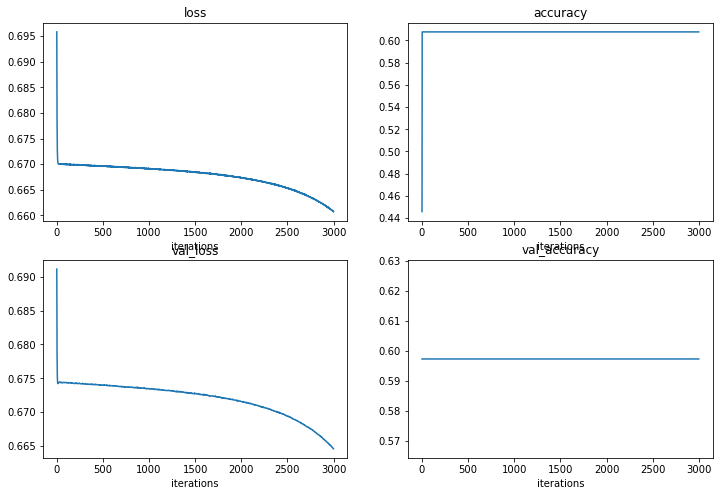

In [597]:
fig = plt.figure(figsize=(12,8))
axes = [fig.add_subplot(2,2,i) for i in range(1,5)]


for i in range(4):
    
    axes[i].plot(model.history[keys[i]])
    axes[i].set(title=keys[i], xlabel='iterations')

In [594]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, nn.predict_classes(x_test)))
confusion_matrix(y_test, nn.predict_classes(x_test))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        89
           1       0.77      0.83      0.80       132

    accuracy                           0.75       221
   macro avg       0.74      0.73      0.73       221
weighted avg       0.74      0.75      0.74       221



C:\Users\luisr\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\luisr\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does 

array([[ 56,  33],
       [ 23, 109]], dtype=int64)

In [131]:
nn.fit?

In [579]:
y.value_counts()

1    632
0    412
Name: Cannabis ever, dtype: int64

In [413]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization

from tensorflow.keras.optimizers import SGD, Adam, RMSprop

nn = Sequential()

nn.add(Dense(30, input_shape=(12,), activation='sigmoid'))
#nn.add(Dense(6, input_shape=(12,), activation='sigmoid'))
#nn.add(Dense(6, input_shape=(12,), activation='sigmoid'))
#nn.add(Dense(6, input_shape=(12,), activation='sigmoid'))

nn.add(Dense(1, activation='sigmoid'))

nn.compile(SGD(lr=0.003), 'binary_crossentropy', metrics=['accuracy'])

nn.summary()

model = nn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=0)

keys = [key for key in model.history.keys()]

keys

fig = plt.figure(figsize=(12,8))
axes = [fig.add_subplot(2,2,i) for i in range(1,5)]


for i in range(4):
    
    axes[i].plot(model.history[keys[i]])
    axes[i].set(title=keys[i], xlabel='iterations')

ModuleNotFoundError: No module named 'seaborn'

In [47]:
nn.compile(SGD(lr=0.003), 'binary_crossentropy', metrics=['accuracy'])

In [41]:
x

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy ever,Heroin ever,Ketamine ever,Legalh ever,LSD ever,Meth ever,Mushrooms ever,Nicotine ever,Semer ever,VSA ever
252,1061,3,1,8,6,1,-0.79151,0.16767,0.29338,-0.01729,...,0,0,0,0,0,0,0,1,0,0
1097,116,1,1,7,6,1,-1.32828,1.28610,0.29338,0.43852,...,0,0,0,0,0,0,1,1,0,0
696,1555,4,0,1,6,1,-0.14882,-1.09207,-0.71727,0.28783,...,1,0,0,1,1,0,1,1,0,1
793,1661,1,1,6,6,1,-0.58016,0.80523,0.44585,0.59042,...,1,0,0,1,0,0,0,1,0,1
1868,971,1,0,1,3,1,-0.14882,1.11406,1.43533,-0.30172,...,1,0,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,872,0,1,1,6,0,1.23461,-0.80615,-0.84732,-1.07533,...,1,0,1,0,0,0,1,0,0,0
1795,891,4,0,7,6,1,-0.58016,1.74091,-1.97495,-1.07533,...,0,0,0,0,0,0,0,1,0,0
1804,900,1,1,7,6,3,0.41667,-0.80615,-0.58331,0.13136,...,0,0,0,0,0,0,0,0,0,0
1812,909,3,0,6,6,1,-1.86962,0.00332,0.14143,-0.76096,...,0,0,0,0,0,0,0,1,0,0
